In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np

sns.set_style("whitegrid")

In [3]:
my_health_data = pd.read_csv('apple_health.csv')

In [4]:
my_health_data['Date'] = pd.to_datetime(my_health_data['Date'])

my_health_data.info()
my_health_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   366 non-null    datetime64[ns]
 1   Active energy burned(Cal)              258 non-null    float64       
 2   Apple Watch stand hours(hr)            254 non-null    float64       
 3   Basal energy burned(Cal)               263 non-null    float64       
 4   Distance walking / running(mi)         366 non-null    float64       
 5   Exercise time(min)                     248 non-null    float64       
 6   Flights climbed(count)                 337 non-null    float64       
 7   Heart rate(count/min)                  256 non-null    float64       
 8   Resting heart rate(count/min)          241 non-null    float64       
 9   Stand time(min)                        254 non-null    float64   

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Distance walking / running(mi),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
361,2023-01-03,404.056,7.0,1941.725,3.727,22.0,10.0,84.776,59.0,92.0,7810.000,101.0
362,2023-01-04,719.154,11.0,2049.560,5.406,67.0,16.0,80.115,60.0,163.0,11083.148,99.0
363,2023-01-05,291.392,10.0,1977.197,2.367,9.0,10.0,86.906,58.0,74.0,4904.000,163.5
364,2023-01-06,295.639,7.0,1994.375,1.420,22.0,8.0,82.837,70.0,51.0,2845.699,91.0
365,2023-01-07,268.435,4.0,1194.194,2.951,14.0,6.0,105.582,79.0,74.0,6125.000,117.5


In [5]:
rolling_dist_mean_weekly = my_health_data['Distance walking / running(mi)'].rolling(window=7).mean()
rolling_dist_mean_monthly = my_health_data['Distance walking / running(mi)'].rolling(window=30).mean()

rolling_steps_mean_weekly = my_health_data['Step count(count)'].rolling(window=7).mean()
rolling_steps_mean_monthly = my_health_data['Step count(count)'].rolling(window=30).mean()

years = mdates.YearLocator()   
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter('%Y-%m')

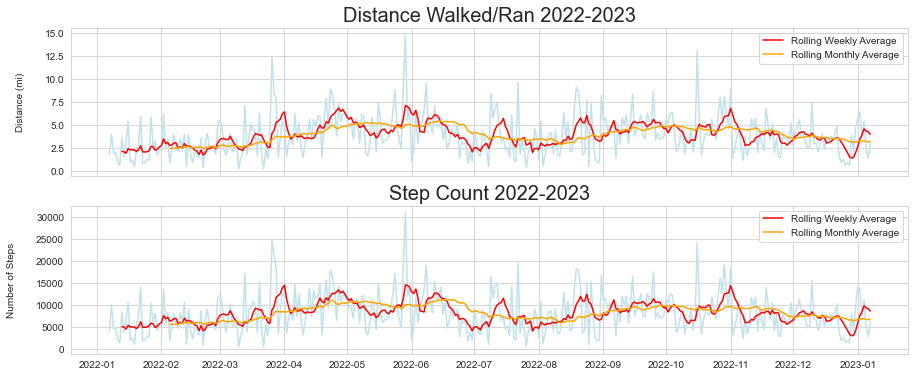

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6), sharex=True)
sns.lineplot(x='Date', y='Distance walking / running(mi)', data=my_health_data, color='#C1E1EC', ax=ax1)
sns.lineplot(x='Date', y=rolling_dist_mean_weekly, label='Rolling Weekly Average', data=my_health_data, color='red', ax=ax1)
sns.lineplot(x='Date', y=rolling_dist_mean_monthly, label='Rolling Monthly Average',data=my_health_data, color='orange', ax=ax1)
ax1.set_title("Distance Walked/Ran 2022-2023", fontdict={'fontsize':20})
ax1.set_ylabel('Distance (mi)')
ax1.set_xlabel('')

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

sns.lineplot(x='Date', y='Step count(count)', data=my_health_data, color='#C1E1EC', ax=ax2)
sns.lineplot(x='Date', y=rolling_steps_mean_weekly, label='Rolling Weekly Average', data=my_health_data, color='red', ax=ax2)
sns.lineplot(x='Date', y=rolling_steps_mean_monthly, label='Rolling Monthly Average',data=my_health_data, color='orange', ax=ax2)
ax2.set_title("Step Count 2022-2023", fontdict={'fontsize':20})
ax2.set_ylabel('Number of Steps')
ax2.set_xlabel('')

ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax2.xaxis.labelpad = 20
ax2.yaxis.labelpad = 20

plt.savefig('Distance_Steps.pdf')

In [7]:
average_hr = my_health_data['Resting heart rate(count/min)'].mean()

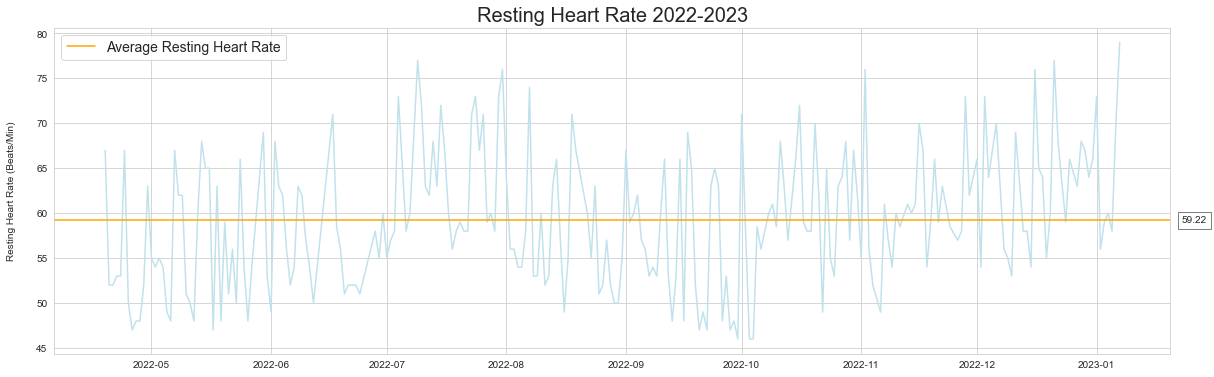

In [8]:
fig, ax = plt.subplots(figsize = (20, 6))
chart = sns.lineplot(x='Date', y='Resting heart rate(count/min)', data=my_health_data, color='#C1E1EC')

chart.axhline(average_hr, color='orange', label='Average Resting Heart Rate')
ax.set_xlabel('')
ax.set_ylabel('Resting Heart Rate (Beats/Min)')
ax.set_title("Resting Heart Rate 2022-2023", fontdict={'fontsize':20})
ax.legend(fontsize=14)

ax.text(1.01, average_hr, str(round(average_hr, 2)), va='center', ha="left", bbox=dict(facecolor="white",alpha=0.5, edgecolor = 'black'),
        transform=ax.get_yaxis_transform())

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

plt.savefig('RHR.pdf')

In [9]:
# creating a 'day of the week' column
my_health_data['dow'] = my_health_data['Date'].dt.strftime('%A')

# grouping by 'dow'
days_grouped = my_health_data.groupby('dow')

# exploring distance by dow
distance_by_dow = days_grouped['Distance walking / running(mi)']
distance_by_dow = pd.DataFrame(distance_by_dow.agg([np.min, np.max, np.mean]))
distance_by_dow = distance_by_dow.reset_index()
distance_by_dow

,dow,amin,amax,mean
0,Friday,0.497,9.606,3.819528
1,Monday,0.391,7.914,3.771269
2,Saturday,0.849,12.401,4.387113
3,Sunday,0.488,14.816,4.600981
4,Thursday,0.207,8.313,3.536923
5,Tuesday,0.236,8.954,3.529904
6,Wednesday,0.476,9.527,3.641519


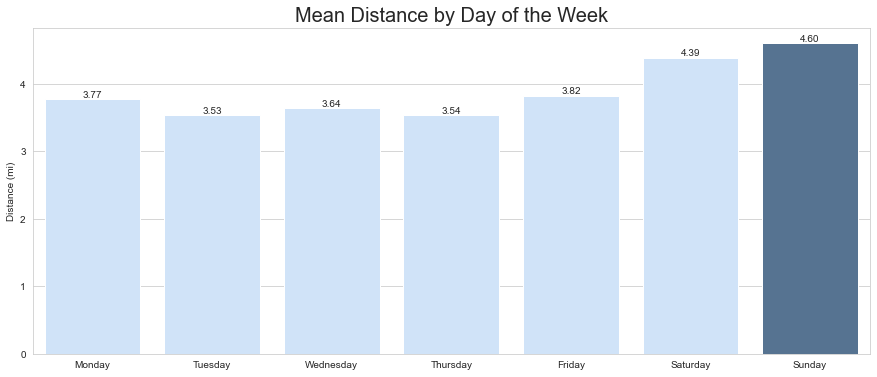

In [10]:
# changing days to numbers to preserve order when plotted
days_num = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
distance_by_dow["dow_num"] = distance_by_dow["dow"].map(days_num)

# list to correct numbers back to day
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize = (15, 6))
chart=sns.barplot(x='dow_num', y='mean', data=distance_by_dow, color='#C9E3FF')
chart.set_xticklabels(days)
ax.set_xlabel('')
ax.set_ylabel('Distance (mi)')
ax.set_title("Mean Distance by Day of the Week", fontdict={'fontsize':20})
ax.bar_label(ax.containers[0], fmt='%.2f')

patch_h = [patch.get_height() for patch in chart.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

chart.patches[idx_tallest].set_facecolor('#567391')  

plt.savefig('Distance_DOW.pdf')

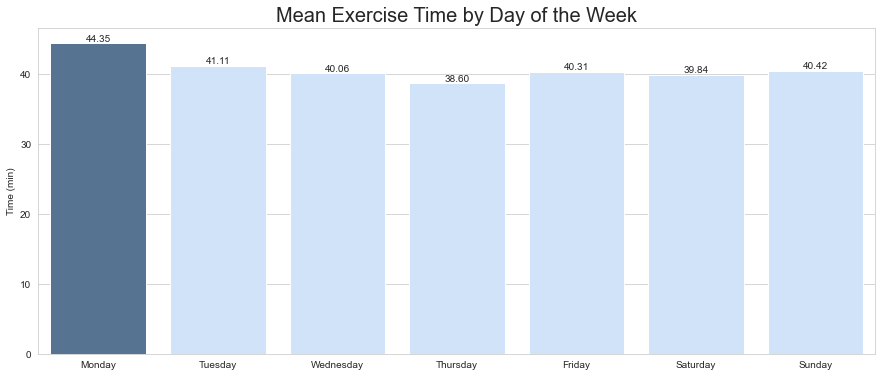

In [11]:
# exploring distance by dow
exercise_by_dow = days_grouped['Exercise time(min)']
exercise_by_dow = pd.DataFrame(exercise_by_dow.agg([np.min, np.max, np.mean]))
exercise_by_dow = exercise_by_dow.reset_index()

# changing days to numbers to preserve order when plotted
days_num = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
exercise_by_dow["dow_num"] = exercise_by_dow["dow"].map(days_num)

# list to correct numbers back to day
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize = (15, 6))
chart=sns.barplot(x='dow_num', y='mean', data=exercise_by_dow, color='#C9E3FF')
chart.set_xticklabels(days)
ax.set_xlabel('')
ax.set_ylabel('Time (min)')
ax.set_title("Mean Exercise Time by Day of the Week", fontdict={'fontsize':20})
ax.bar_label(ax.containers[0], fmt='%.2f')

patch_h = [patch.get_height() for patch in chart.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

chart.patches[idx_tallest].set_facecolor('#567391')  

plt.savefig('Exercise_DOW.pdf')

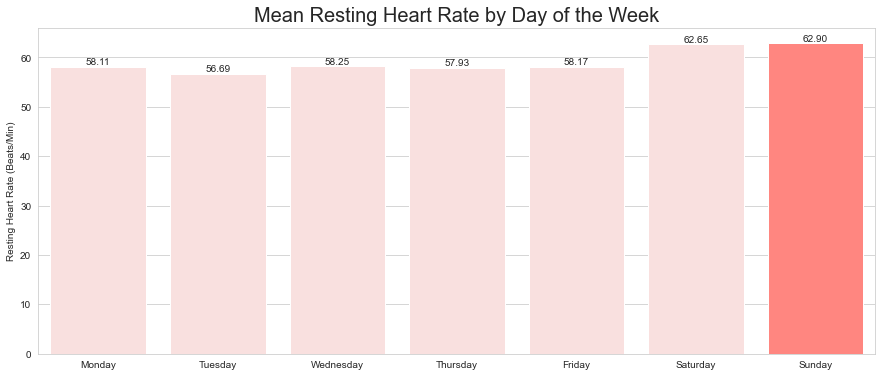

In [12]:
# exploring distance by dow
rhr_by_dow = days_grouped['Resting heart rate(count/min)']
rhr_by_dow = pd.DataFrame(rhr_by_dow.agg([np.min, np.max, np.mean]))
rhr_by_dow = rhr_by_dow.reset_index()

# changing days to numbers to preserve order when plotted
days_num = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
rhr_by_dow["dow_num"] = rhr_by_dow["dow"].map(days_num)

# list to correct numbers back to day
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize = (15, 6))
chart=sns.barplot(x='dow_num', y='mean', data=rhr_by_dow, color='#FEDCDA')
chart.set_xticklabels(days)
ax.set_xlabel('')
ax.set_ylabel('Resting Heart Rate (Beats/Min)')
ax.set_title("Mean Resting Heart Rate by Day of the Week", fontdict={'fontsize':20})
ax.bar_label(ax.containers[0], fmt='%.2f')

patch_h = [patch.get_height() for patch in chart.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

chart.patches[idx_tallest].set_facecolor('#FF8680')  

plt.savefig('RHR_DOW.pdf')